In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [39]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


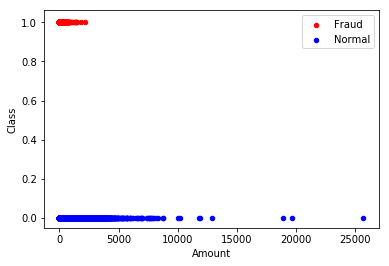

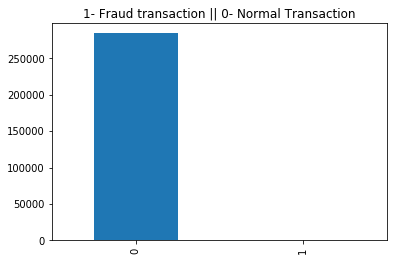

In [40]:
ax = fraud.plot.scatter(x='Amount', y='Class', color = 'Red', label = 'Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color = 'Blue', label = 'Normal', ax=ax)
plt.show()

target_count = df.Class.value_counts()
target_count.plot(kind='pie', title='1- Fraud transaction || 0- Normal Transaction');




In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [0]:
x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train,y_train)
print('Score liblinear: ', logistic.score(X_test,y_test))

logistic_saga = linear_model.LogisticRegression(C=1e5, solver = 'saga' )
logistic_saga.fit(X_train,y_train)
print('Score saga: ', logistic_saga.score(X_test,y_test))

logistic_newtoncg = linear_model.LogisticRegression(C=1e5, solver = 'newton-cg' )
logistic_newtoncg.fit(X_train,y_train)
print('Score newtoncg: ', logistic_newtoncg.score(X_test,y_test))

randomforest_clf = RandomForestClassifier()
randomforest_clf.fit(X_train,y_train)
pred_y_4 = randomforest_clf.predict(X_test)
#print( np.unique( pred_y_4 ) )
print( accuracy_score(y_test, pred_y_4) )


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score liblinear:  0.9988939995084443


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score saga:  0.9983322214809873


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

Score newtoncg:  0.9992099996488887
0.9994382219725431
